# Лабораторная работа №1
## Пункты 3.1, 3.2, 3.5

### Импортим либы

In [17]:
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tabulate

### Настройки и вспомогательные функции 

In [18]:
# random.seed(1)  # for same results

BINS=32         # number of columns on charts 
DEG=6           #from 2 to 6, for N
N=10**DEG 


def R() -> float:
    R = 0
    while R == 0:
        R = random.random()
    return R

### Равномерное распределение

In [19]:
def even_dist(a: int, b: int, n: int) -> list:
    dist = [0] * n
    for i in range(n):
        dist[i] = a + R()*(b-a)
    return dist 


### Тест

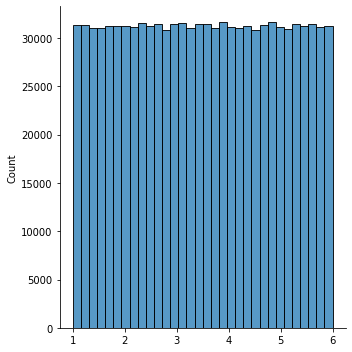

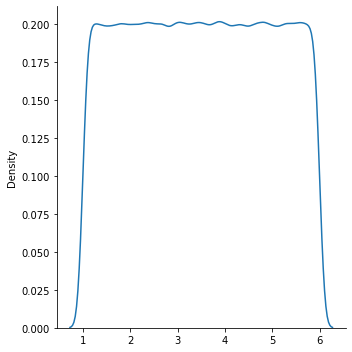

In [20]:
a=1
b=6

d1 = even_dist(a, b, N)
seaborn.displot(d1, bins=BINS)
seaborn.displot(d1, kind='kde')

### Экспоненциальное распределение

In [21]:
def exp_dist(l: int, n: int) -> list:
    dist = [0] * n
    for i in range(n):
        dist[i] = (-1) * math.log(R())/ l
    return dist 

### Тест

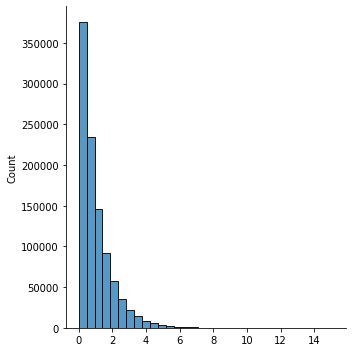

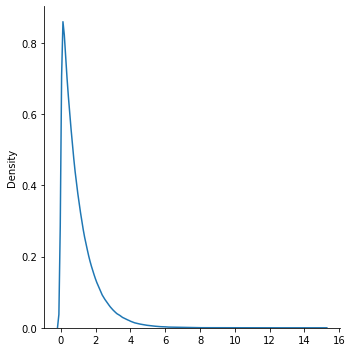

In [22]:
l=1

d2 = exp_dist(l, N)
seaborn.displot(d2, bins=BINS)
seaborn.displot(d2, kind='kde')

### Нормальное распределение

In [23]:
def norm_dist(m: int, s:int, n: int) -> list:
    dist = [0] * n
    for i in range(n):
        R12 = 0
        for j in range(12):
            R12 += R()
        dist[i] = m + s * (R12 - 6)
    return dist 

### Тест

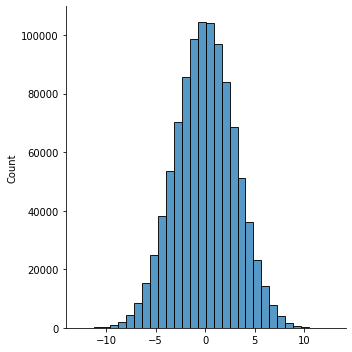

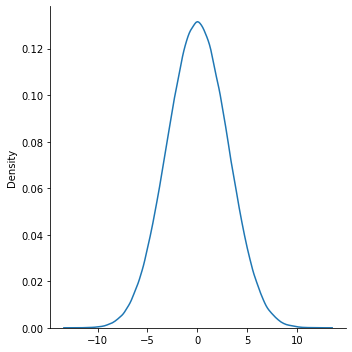

In [24]:
m=0
s=3

d3 = norm_dist(m, s, N)
seaborn.displot(d3, bins=BINS)
seaborn.displot(d3, kind='kde')

## Пункты 3.3, 3.4

### Функции, рассчитывающие мат. ожидание и дисперсию

In [25]:
def M(dist: list) -> float:
    return np.mean(dist)

def D(dist: list) -> float:
    return np.var(dist, ddof=1)

### Создание всех необходимых размеров выборок

In [26]:
n = 10
NS = [n]

while (n < N):
    n *= 2
    NS.append(int(n))
    n *= 2.5
    NS.append(int(n))
    n*=2
    NS.append(int(n))

# instead of
# NS = [10, 20, 50, 100, 200, 500, 1000...]

### Выборки, мат. ожидания, дисперсии, их действительные значения по всем трем распределениям dists...
Итого вспомогательная таблица **t, dists и true_t**

In [27]:
dists = [d1, d2, d3]
est = [[None for i in range(len(NS))] for j in range(len(dists) * 2)]

for i in range(len(dists)):
    for j in range(len(NS)):
        est[2*i][j] = M(random.choices(dists[i], k=NS[j])) 
        est[2*i+1][j] = D(random.choices(dists[i], k=NS[j]))
        # random.choices(list, k) - выберет из list k элементов случайным образом (могут повторяться)

true_est = [(a+b)/2, ((b-a)**2)/12, 1/l, 1/(l*l), m, s]

### Вывод таблицы

In [28]:
table = []
dist_names = ['even', 'exp', 'norm']
h = ["N(i)"] + NS + [True]

for i in range(len(dists)):
    table.append([f'M({dist_names[i]}_dist)'] + est[2*i] + [true_est[2*i]])
    table.append([f'D({dist_names[i]}_dist)'] + est[2*i+1] + [true_est[2*i+1]])

print(tabulate.tabulate(table, headers=h, tablefmt="fancy_grid", floatfmt=".3f"))

╒══════════════╤═══════╤════════╤════════╤═══════╤════════╤════════╤════════╤════════╤════════╤═════════╤═════════╤═════════╤══════════╤══════════╤══════════╤═══════════╤════════╕
│ N(i)         │    10 │     20 │     50 │   100 │    200 │    500 │   1000 │   2000 │   5000 │   10000 │   20000 │   50000 │   100000 │   200000 │   500000 │   1000000 │   True │
╞══════════════╪═══════╪════════╪════════╪═══════╪════════╪════════╪════════╪════════╪════════╪═════════╪═════════╪═════════╪══════════╪══════════╪══════════╪═══════════╪════════╡
│ M(even_dist) │ 2.984 │  3.516 │  3.296 │ 3.428 │  3.783 │  3.476 │  3.512 │  3.460 │  3.531 │   3.531 │   3.517 │   3.502 │    3.503 │    3.498 │    3.498 │     3.499 │  3.500 │
├──────────────┼───────┼────────┼────────┼───────┼────────┼────────┼────────┼────────┼────────┼─────────┼─────────┼─────────┼──────────┼──────────┼──────────┼───────────┼────────┤
│ D(even_dist) │ 1.876 │  2.415 │  2.640 │ 2.167 │  2.159 │  2.013 │  2.179 │  1.991 │  2.042 │   2.

### Подготовка данных для вывода графика зависимостей оценок от объема выборки

In [36]:
nplist = []
hh = [f'N{i+1}' for i in range(len(h)-1)]
hh[-1] = 'N' # подписи для оси Х

# загоняем все данные в датафрейм в ненормализованном виде
for i in range(len(table)):
    for j in range(1, len(table[i])):
        nplist.append([table[i][0], hh[j-1], table[i][j]])
# print(tabulate.tabulate(nplist))
# tabulate(nplist)

data = pd.DataFrame(np.array(nplist), columns=['est-dist', 'sample', 'value'])
data = data.astype({'value': np.double }) # нужно дать нормальный тип столбцу, который будет вертикальной осью

------------  ---  -----------
M(even_dist)  N1    2.98397
M(even_dist)  N2    3.51622
M(even_dist)  N3    3.29649
M(even_dist)  N4    3.4281
M(even_dist)  N5    3.78337
M(even_dist)  N6    3.47589
M(even_dist)  N7    3.51182
M(even_dist)  N8    3.45981
M(even_dist)  N9    3.53082
M(even_dist)  N10   3.53135
M(even_dist)  N11   3.51703
M(even_dist)  N12   3.50152
M(even_dist)  N13   3.50253
M(even_dist)  N14   3.4977
M(even_dist)  N15   3.49811
M(even_dist)  N16   3.49908
M(even_dist)  N     3.5
D(even_dist)  N1    1.87625
D(even_dist)  N2    2.41475
D(even_dist)  N3    2.64017
D(even_dist)  N4    2.16739
D(even_dist)  N5    2.15867
D(even_dist)  N6    2.01288
D(even_dist)  N7    2.17903
D(even_dist)  N8    1.99051
D(even_dist)  N9    2.04156
D(even_dist)  N10   2.07359
D(even_dist)  N11   2.08313
D(even_dist)  N12   2.08132
D(even_dist)  N13   2.07604
D(even_dist)  N14   2.08847
D(even_dist)  N15   2.08161
D(even_dist)  N16   2.08369
D(even_dist)  N     2.08333
M(exp_dist)   N1    0.5

### Все зависимости на одном графике

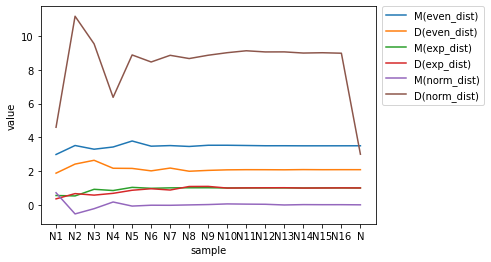

In [38]:
seaborn.lineplot(data, x='sample', y='value', hue='est-dist')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) # для вывода легенды справа

### Каждая оценка на отдельном графике

/var/data/python/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/var/data/python/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/var/data/python/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/var/data/python/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/var/data/python/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and

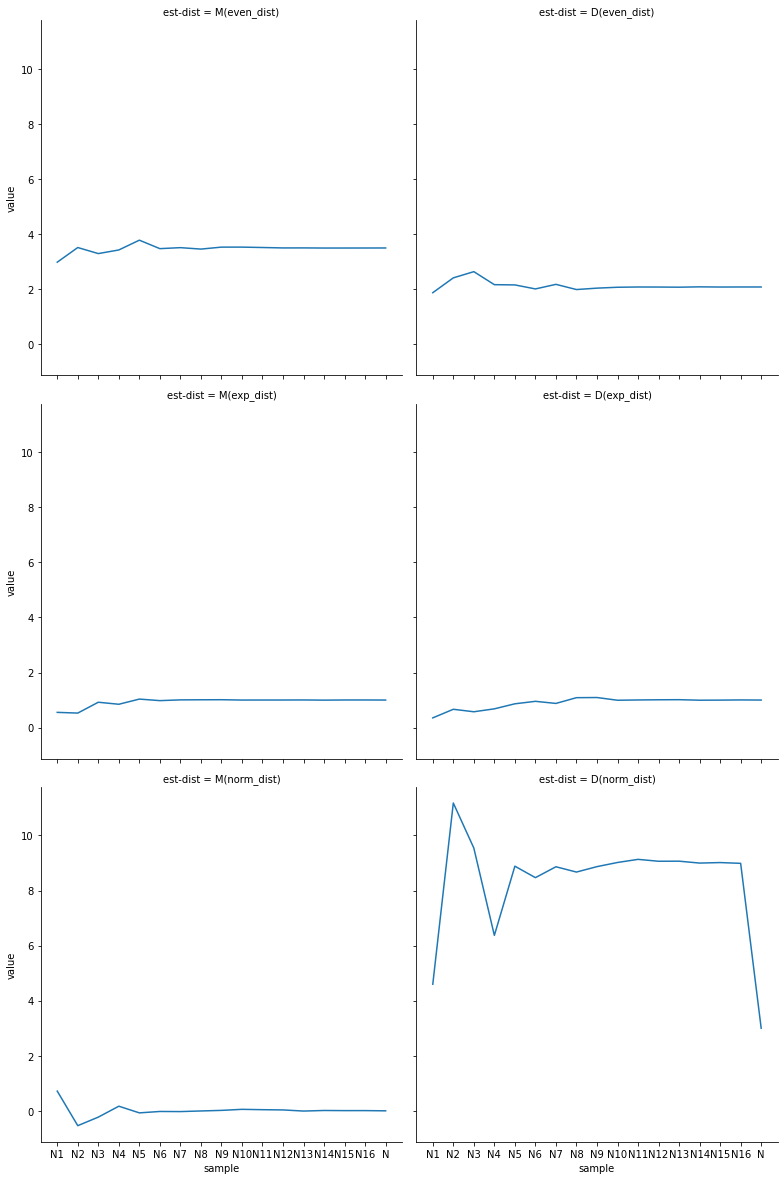

In [39]:
g = seaborn.FacetGrid(data, col='est-dist', col_wrap=2, height=5.5)
g.map(seaborn.lineplot, 'sample', 'value')